# Preparing the dataset

## Importing the libraries

In [1]:
#to read the dataframe
import pandas as pd    

#to plot
import matplotlib.pyplot as plt

#to measure the time
import time

#to call mathematical functions
import math

#to draw tables
from tabulate import tabulate

#to split the dataset into training set and testing set
from sklearn.model_selection import train_test_split

#to run the k-cross validation 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#for linear regression
from sklearn.linear_model import LinearRegression

#for random forest regression
from sklearn.ensemble import RandomForestRegressor

#for knn regression
from sklearn import neighbors

#for evaluation 
from sklearn import metrics

## Reading the dataset as a dataframe

In [2]:
df = pd.read_excel('Folds5x2_pp.xlsx')

In [3]:
df.head(5)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Discovering the dataset 

In [4]:
#show the number of cells in the dataframe
print("dataset size: ", df.size)

#show the number of records (rows) in the dataframe
print("number of records: ", len(df))

#show the number of features (coulmns) in the dataframe (exculde the response variable)
print("number of features: ", len(df.columns)-1) 

dataset size:  47840
number of records:  9568
number of features:  4


In [5]:
#show the number of null values in each column
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
#show each feature with its given description from UCI
Description = df.copy()
Description = Description.rename(columns = {'AT' : 'Temperature (T) in the range 1.81°C and 37.11°C',
                              'AP' : 'Ambient Pressure (AP) in the range 992.89-1033.30 milibar',
                              'V' : 'Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg',
                              'RH' : 'Relative Humidity (RH) in the range 25.56% to 100.16%', 
                              'PE' : 'Net hourly electrical energy output (EP) 420.26-495.76 MW'})
Description.head(5)

,Temperature (T) in the range 1.81°C and 37.11°C,Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg,Ambient Pressure (AP) in the range 992.89-1033.30 milibar,Relative Humidity (RH) in the range 25.56% to 100.16%,Net hourly electrical energy output (EP) 420.26-495.76 MW
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Spliting the dataset into training set and testing set

In [7]:
#split the dataset into two parts: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns= {'PE'}), df['PE'], test_size=0.2, random_state=42)

## Preparing the cross validation

In [8]:
#Prepare a cross validation model with 10 folds
Cross_Validation = KFold(n_splits = 10, shuffle=True, random_state = 42)

# Applying Linear Regression

In [9]:
LR_implementation_start_time = time.perf_counter()    #start the implementation time counter
LR_Model = LinearRegression()  #prepare the linear regression model

LR_fitting_start_time = time.perf_counter()  #start the fitting time counter

#fit the training set into the linear regression model & evaluate the performance using cross validation scores
LR_performance_scores = cross_val_score(LR_Model, X_train, y_train, cv=Cross_Validation) 

LR_fitting_end_time = time.perf_counter() #stop the fitting time counter

LR_implementation_end_time = time.perf_counter() #stop the implemntation time counter

print('the performance scores of the linear regression:')
print(LR_performance_scores)

#get the average of the scores
LR_average_performance = LR_performance_scores.mean()

#get the implmentation time 
LR_implementation_time = LR_implementation_end_time - LR_implementation_start_time

#get the fitting time
LR_fitting_time = LR_fitting_end_time - LR_fitting_start_time

print('Linear Regression Results: ')
print('Implementation time =', LR_implementation_time)
print('Fitting time = ', LR_fitting_time)
print('Performance = ', LR_average_performance)

the performance scores of the linear regression:
[0.92250325 0.9220288  0.92586958 0.93063517 0.93572724 0.92870631
 0.92431972 0.93523375 0.92210924 0.93421659]
Linear Regression Results: 
Implementation time = 0.06470149999999997
Fitting time =  0.06460709999999992
Performance =  0.928134965279164


# Applying Random Forest Regression

## Choosing the suitable hyperparameters 

In [10]:
RF_implementation_start_time = time.perf_counter()    #start the implementation time counter

### **1- n-estimators:** number of trees in the forest

In [11]:
N_estimators = []
N_estimators_fitting_time = []
N_estimators_performance = []

#try different values of N_estimators 
for i in range(1, 20):  
  RF_i = RandomForestRegressor(n_estimators = i)
  fitting_time_start_i = time.perf_counter()
  RF_Scores_i = cross_val_score(RF_i, X_train, y_train, cv=Cross_Validation)
  fitting_time_end_i = time.perf_counter()

  fitting_time_i = fitting_time_end_i - fitting_time_start_i
  performance_i = RF_Scores_i.mean()

  N_estimators.append(i)
  N_estimators_fitting_time.append(fitting_time_i)
  N_estimators_performance.append(performance_i)

print('the fitting time of different N_estimators:')
print(N_estimators_fitting_time)

print('the performance scores of different N_estimators:')
print(N_estimators_performance)

the fitting time of different N_estimators:
[0.26530500000000057, 0.41801270000000024, 0.6146585, 0.7918707999999999, 0.9502633999999999, 1.0815310999999994, 1.3198279, 1.4806512000000005, 1.6227859999999996, 1.8250976000000012, 1.9902136000000006, 2.2678474999999985, 2.3644035999999993, 2.4893513000000027, 2.6501884999999987, 2.8577007000000023, 3.023241999999996, 3.2135590000000036, 3.357434099999999]
the performance scores of different N_estimators:
[0.9155157182086532, 0.9391076170626886, 0.9481484860753813, 0.9492965359661365, 0.952020689236587, 0.9535350353083503, 0.9536731819930153, 0.9549909732602819, 0.955710762567733, 0.9557809494867723, 0.9572406263068034, 0.9562954237351275, 0.9564934995486418, 0.9573883323805816, 0.9576554209778626, 0.9578097586153831, 0.9575976856317434, 0.9581423468985291, 0.9580755364068269]


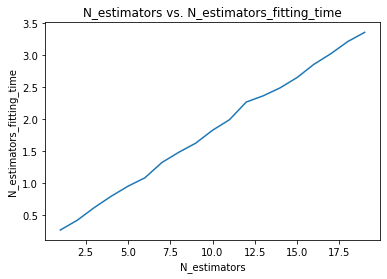

In [12]:
plt.plot(N_estimators, N_estimators_fitting_time)
plt.xlabel('N_estimators') 
plt.ylabel('N_estimators_fitting_time') 
plt.title('N_estimators vs. N_estimators_fitting_time')  
plt.show()

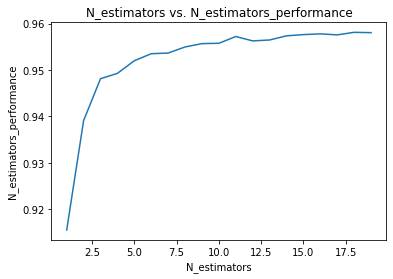

In [13]:
plt.plot(N_estimators, N_estimators_performance)
plt.xlabel('N_estimators') 
plt.ylabel('N_estimators_performance') 
plt.title('N_estimators vs. N_estimators_performance')  
plt.show()

### **2- criterion:** The function to measure the quality of a split.

In [14]:
RF_mae = RandomForestRegressor(n_estimators=8, criterion='mae')

RF_mae_fitting_time_start = time.perf_counter()
RF_mae_scores = cross_val_score(RF_mae, X_train, y_train, cv=Cross_Validation)
RF_mae_fitting_time_end = time.perf_counter()
print('Random Forest regression with mae criterion:')
print('Fitting time: ', RF_mae_fitting_time_end - RF_mae_fitting_time_start)
print('Performance: ', RF_mae_scores.mean())

RF_mse = RandomForestRegressor(n_estimators=8, criterion='mse')

RF_mse_fitting_time_start = time.perf_counter()
RF_mse_scores = cross_val_score(RF_mse, X_train, y_train, cv=Cross_Validation)
RF_mse_fitting_time_end = time.perf_counter()
print('Random Forest regression with mse criterion:')
print('Fitting time: ',RF_mse_fitting_time_end - RF_mse_fitting_time_start)
print('Performance: ', RF_mse_scores.mean())

Random Forest regression with mae criterion:
Fitting time:  27.283622200000003
Performance:  0.9537716228159686
Random Forest regression with mse criterion:
Fitting time:  1.3292043000000007
Performance:  0.9544909669500921


### **3- max_features:** The number of features to consider when looking for the best split

In [15]:
RF_auto = RandomForestRegressor(n_estimators=8, criterion='mse', max_features="auto")
RF_auto_fitting_time_start = time.perf_counter()
RF_auto_scores = cross_val_score(RF_auto, X_train, y_train, cv=Cross_Validation)
RF_auto_fitting_time_end = time.perf_counter()
print('Random Forest regression with max_features = n:')
print('Fitting time: ', RF_auto_fitting_time_end - RF_auto_fitting_time_start)
print('Performance: ', RF_auto_scores.mean())

RF_sqrt = RandomForestRegressor(n_estimators=8, criterion='mse', max_features="sqrt")
RF_sqrt_fitting_time_start = time.perf_counter()
RF_sqrt_scores = cross_val_score(RF_sqrt, X_train, y_train, cv=Cross_Validation)
RF_sqrt_fitting_time_end = time.perf_counter()
print('Random Forest regression with max_features = sqrt(n):')
print('Fitting time: ', RF_sqrt_fitting_time_end - RF_sqrt_fitting_time_start)
print('Performance: ', RF_sqrt_scores.mean())

RF_log2 = RandomForestRegressor(n_estimators=8, criterion='mse', max_features="log2")
RF_log2_fitting_time_start = time.perf_counter()
RF_log2_scores = cross_val_score(RF_log2, X_train, y_train, cv=Cross_Validation)
RF_log2_fitting_time_end = time.perf_counter()
print('Random Forest regression with max_features = log2(n):')
print('Fitting time: ', RF_log2_fitting_time_end - RF_log2_fitting_time_start)
print('Performance: ', RF_log2_scores.mean())

Random Forest regression with max_features = n:
Fitting time:  1.317477199999999
Performance:  0.9542193770479453
Random Forest regression with max_features = sqrt(n):
Fitting time:  0.8319592999999941
Performance:  0.9565688657942127
Random Forest regression with max_features = log2(n):
Fitting time:  0.8274352000000107
Performance:  0.9561693285896832


## Getting the final model

In [16]:
RF_Model = RandomForestRegressor(n_estimators=8, criterion='mse', max_features="sqrt")

RF_fitting_start_time = time.perf_counter()  #start the fitting time counter
#fit the training set into the random fores regression model & evaluate the performance using cross validation scores
RF_performance_scores = cross_val_score(RF_Model, X_train, y_train, cv=Cross_Validation) 

RF_fitting_end_time = time.perf_counter() #stop the fitting time counter

RF_implementation_end_time = time.perf_counter() #stop the implemntation time counter

print('the performance scores of the random forest regression:')
print(RF_performance_scores)

#get the average of the scores
RF_average_performance = RF_performance_scores.mean()

#get the implmentation time 
RF_implementation_time = RF_implementation_end_time - RF_implementation_start_time

#get the fitting time
RF_fitting_time = RF_fitting_end_time - RF_fitting_start_time

print('Random Forest Regression Results: ')
print('Implementation time =', RF_implementation_time)
print('Fitting time = ', RF_fitting_time)
print('Performance = ', RF_average_performance)

the performance scores of the random forest regression:
[0.9503349  0.95259939 0.95319808 0.94965892 0.96445926 0.96036732
 0.94958889 0.9601694  0.95423202 0.96665879]
Random Forest Regression Results: 
Implementation time = 67.46766729999999
Fitting time =  0.8408417999999926
Performance =  0.9561266976694925


# Applying K-Nearest Neighbors Regression

## Choosing the suitable hyperparameters 

In [17]:
KNN_implementation_start_time = time.perf_counter()    #start the implementation time counter

### 1- **n_neighbors** : Number of neighbors to use by default for kneighbors queries

In [18]:
#getting the maximum number of neighbors that could be used
max_possible_k = math.floor(0.9 * len(X_train))
print(max_possible_k)

6888


As it is very hard to compute the results of the regression models by changing the k from 1 till max_possible_k, we can use for loop with large step. 

In [19]:
N_neighbors = []
N_neighbors_fitting_time = []
N_neighbors_performance = []

#try different values of N_neighbors
mx = max_possible_k
step = math.floor(mx/10) 
for i in range(1, mx, step):  
  KNN_i = neighbors.KNeighborsRegressor(n_neighbors = i)
  fitting_time_start_i = time.perf_counter()
  KNN_Scores_i = cross_val_score(KNN_i, X_train, y_train, cv=Cross_Validation)
  fitting_time_end_i = time.perf_counter()

  fitting_time_i = fitting_time_end_i - fitting_time_start_i
  performance_i = KNN_Scores_i.mean()

  N_neighbors.append(i)
  N_neighbors_fitting_time.append(fitting_time_i)
  N_neighbors_performance.append(performance_i)

print('the fitting time of different N_neighbors:')
print(N_neighbors_fitting_time)

print('the performance scores of different N_neighbors:')
print(N_neighbors_performance)

the fitting time of different N_neighbors:
[0.10519610000000057, 0.9629205000000098, 1.7464946999999995, 2.485200600000013, 3.1973026000000004, 3.8830784000000023, 3.685422799999998, 4.041453799999999, 4.4623201999999935, 5.256336300000001, 5.818050299999996]
the performance scores of different N_neighbors:
[0.9229696140091377, 0.8721826182237425, 0.8374616900525407, 0.8068745834428304, 0.7686750259873525, 0.7070950822373152, 0.6149726374005343, 0.48851058087700194, 0.3324959899657338, 0.16502328607129568, 0.0010884900123979801]


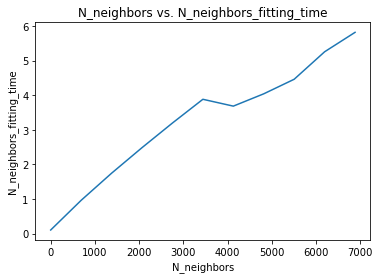

In [20]:
plt.plot(N_neighbors, N_neighbors_fitting_time)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_fitting_time') 
plt.title('N_neighbors vs. N_neighbors_fitting_time')  
plt.show()

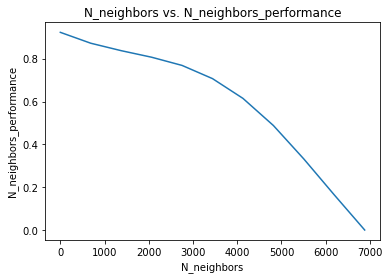

In [21]:
plt.plot(N_neighbors, N_neighbors_performance)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_performance') 
plt.title('N_neighbors vs. N_neighbors_performance')  
plt.show()

we can notice that the performance decreases when the k increases. So we can repeat the same loop by taking the first part and decreasing the step to have better results.

In [22]:
N_neighbors = []
N_neighbors_fitting_time = []
N_neighbors_performance = []

#try different values of N_neighbors
mx = math.floor(max_possible_k/10)
step = math.floor(mx/10) 
for i in range(1, mx, step):  
  KNN_i = neighbors.KNeighborsRegressor(n_neighbors = i)
  fitting_time_start_i = time.perf_counter()
  KNN_Scores_i = cross_val_score(KNN_i, X_train, y_train, cv=Cross_Validation)
  fitting_time_end_i = time.perf_counter()

  fitting_time_i = fitting_time_end_i - fitting_time_start_i
  performance_i = KNN_Scores_i.mean()

  N_neighbors.append(i)
  N_neighbors_fitting_time.append(fitting_time_i)
  N_neighbors_performance.append(performance_i)

print('the fitting time of different N_neighbors:')
print(N_neighbors_fitting_time)

print('the performance scores of different N_neighbors:')
print(N_neighbors_performance)

the fitting time of different N_neighbors:
[0.1160416999999967, 0.23851430000000562, 0.3410180000000054, 0.4442619999999948, 0.5393363000000022, 0.6314172999999954, 0.7371029000000107, 0.7843549999999908, 0.8812089000000043, 0.9590223000000009, 1.0473466999999914]
the performance scores of different N_neighbors:
[0.9229696140091377, 0.9275905750944343, 0.9182236467727549, 0.9106368335587876, 0.9040092614840731, 0.8977034683156326, 0.8920362238940678, 0.8867869347908736, 0.8818650361910638, 0.8771289561977744, 0.872672626714236]


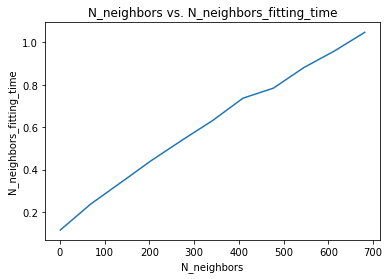

In [23]:
plt.plot(N_neighbors, N_neighbors_fitting_time)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_fitting_time') 
plt.title('N_neighbors vs. N_neighbors_fitting_time')  
plt.show()

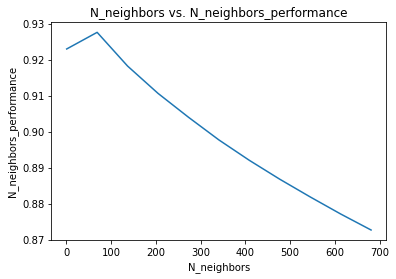

In [24]:
plt.plot(N_neighbors, N_neighbors_performance)
plt.xlabel('N_neighbors') 
plt.ylabel('N_neighbors_performance') 
plt.title('N_neighbors vs. N_neighbors_performance')  
plt.show()

In [25]:
#getting the information of best performance:
KNN_best_k_performance = max(N_neighbors_performance)
KNN_best_k_index = N_neighbors_performance.index(KNN_best_k_performance)
KNN_best_k = N_neighbors[KNN_best_k_index]
KNN_best_k_fitting_time = N_neighbors_fitting_time[KNN_best_k_index]

print('Best K:', KNN_best_k)
print('Best K performance:', KNN_best_k_performance)
print('Best K fitting time:', KNN_best_k_fitting_time)

Best K: 69
Best K performance: 0.9275905750944343
Best K fitting time: 0.23851430000000562


### **2- weights:** weight function used in prediction

In [26]:
KNN_uniform = neighbors.KNeighborsRegressor(n_neighbors = KNN_best_k, weights='uniform')

KNN_uniform_fitting_time_start = time.perf_counter()
KNN_uniform_scores = cross_val_score(KNN_uniform, X_train, y_train, cv=Cross_Validation)
KNN_uniform_fitting_time_end = time.perf_counter()
print('K-Nearest Neighbors regression with uniform weight:')
print('Fitting time: ', KNN_uniform_fitting_time_end - KNN_uniform_fitting_time_start)
print('Performance: ', KNN_uniform_scores.mean())

KNN_distance = neighbors.KNeighborsRegressor(n_neighbors = KNN_best_k, weights='distance')

KNN_distance_fitting_time_start = time.perf_counter()
KNN_distance_scores = cross_val_score(KNN_distance, X_train, y_train, cv=Cross_Validation)
KNN_distance_fitting_time_end = time.perf_counter()
print('K-Nearest Neighbors regression with distance weight:')
print('Fitting time: ', KNN_distance_fitting_time_end - KNN_distance_fitting_time_start)
print('Performance: ', KNN_distance_scores.mean())

K-Nearest Neighbors regression with uniform weight:
Fitting time:  0.24329290000000015
Performance:  0.9275905750944343
K-Nearest Neighbors regression with distance weight:
Fitting time:  0.24806139999999743
Performance:  0.9359595190357208


## Getting the final model

In [27]:
KNN_Model = neighbors.KNeighborsRegressor(n_neighbors = KNN_best_k, weights='distance')

KNN_fitting_start_time = time.perf_counter()  #start the fitting time counter
#fit the training set into the K-Nearest Neighbors regression model & evaluate the performance using cross validation scores
KNN_performance_scores = cross_val_score(KNN_Model, X_train, y_train, cv=Cross_Validation) 

KNN_fitting_end_time = time.perf_counter() #stop the fitting time counter

KNN_implementation_end_time = time.perf_counter() #stop the implemntation time counter

print('the performance scores of the random forest regression:')
print(KNN_performance_scores)

#get the average of the scores
KNN_average_performance = KNN_performance_scores.mean()

#get the implmentation time 
KNN_implementation_time = KNN_implementation_end_time - KNN_implementation_start_time

#get the fitting time
KNN_fitting_time = KNN_fitting_end_time - KNN_fitting_start_time

print('K-Nearest Neighbors Regression Results: ')
print('Implementation time =', KNN_implementation_time)
print('Fitting time = ', KNN_fitting_time)
print('Performance = ', KNN_average_performance)

the performance scores of the random forest regression:
[0.93131026 0.93079939 0.93688031 0.93082163 0.93931481 0.94109557
 0.93115609 0.94038661 0.93071588 0.94711466]
K-Nearest Neighbors Regression Results: 
Implementation time = 43.810478200000006
Fitting time =  0.24882030000000555
Performance =  0.9359595190357208


# Comparision of models

In [28]:
results_table = [['Model', 'Implementation time', 'Fitting time', 'Performance'],
                 ['Linear Regression', LR_implementation_time, LR_fitting_time, LR_average_performance],
                 ['Random Forest Regression', RF_implementation_time, RF_fitting_time, RF_average_performance],
                 ['KNN Regression', KNN_implementation_time, KNN_fitting_time, KNN_average_performance]]
print(tabulate(results_table, headers='firstrow', tablefmt='fancy_grid'))


╒══════════════════════════╤═══════════════════════╤════════════════╤═══════════════╕
│ Model                    │   Implementation time │   Fitting time │   Performance │
╞══════════════════════════╪═══════════════════════╪════════════════╪═══════════════╡
│ Linear Regression        │             0.0647015 │      0.0646071 │      0.928135 │
├──────────────────────────┼───────────────────────┼────────────────┼───────────────┤
│ Random Forest Regression │            67.4677    │      0.840842  │      0.956127 │
├──────────────────────────┼───────────────────────┼────────────────┼───────────────┤
│ KNN Regression           │            43.8105    │      0.24882   │      0.93596  │
╘══════════════════════════╧═══════════════════════╧════════════════╧═══════════════╛


# Testing

## choose and test Linear regression

In [29]:
LR_Model.fit(X_train, y_train)
LR_y_pred = LR_Model.predict(X_test)
print('Linear Regression MSE: ', metrics.mean_squared_error(y_test, LR_y_pred))

Linear Regression MSE:  20.273705999687447


## choose and test random forest regression

In [30]:
RF_Model.fit(X_train, y_train)
RF_y_pred = RF_Model.predict(X_test)
print('Random Forest Regression MSE: ', metrics.mean_squared_error(y_test, RF_y_pred))

Random Forest Regression MSE:  11.213581298164849


## choose and test K-Nearest Neighbors regression

In [31]:
KNN_Model.fit(X_train, y_train)
KNN_y_pred = KNN_Model.predict(X_test)
print('Random Forest Regression MSE: ', metrics.mean_squared_error(y_test, KNN_y_pred))

Random Forest Regression MSE:  17.142891341908364
